In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from minisom import MiniSom

# Load the dataset
data = pd.read_csv('Mall_Customers.csv')
X = data.iloc[:, [3, 4]].values  # Using Annual Income and Spending Score for clustering


In [5]:
# Initialize the SOM
som = MiniSom(x=10, y=10, input_len=2, sigma=1.0, learning_rate=0.5)

# Randomly initialize the weights
som.random_weights_init(X)

# Train the SOM
som.train_random(data=X, num_iteration=100)


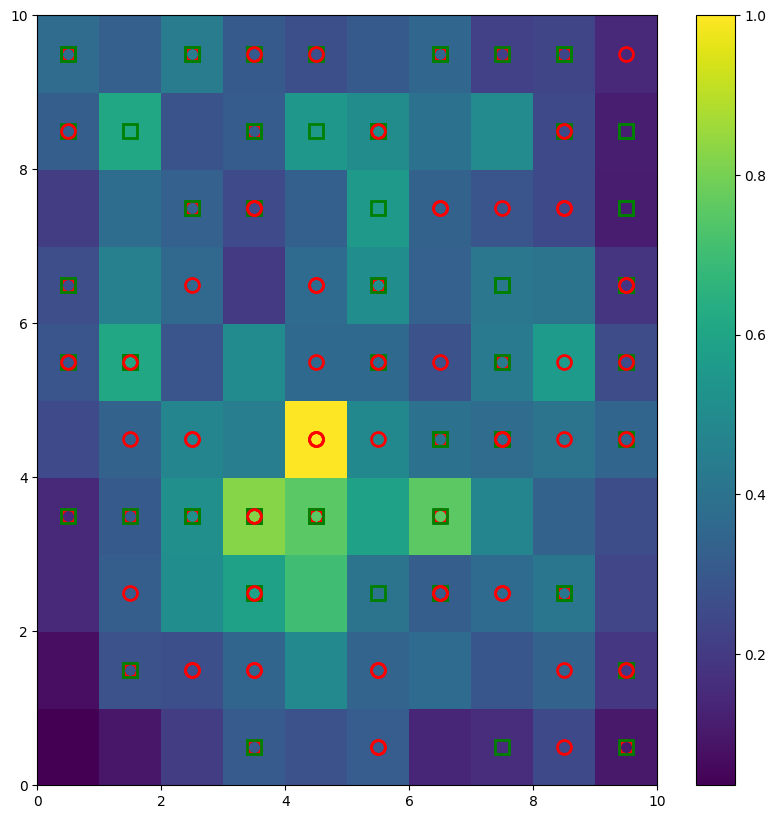

In [6]:
# Visualize the results
plt.figure(figsize=(10, 10))
plt.pcolor(som.distance_map().T)  # distance_map returns the mean inter-neuron distance
plt.colorbar()

# Plotting markers for each input data point
markers = ['o', 's']
colors = ['r', 'g']

for i, x in enumerate(X):
    w = som.winner(x)  # Getting the winning node
    plt.plot(w[0] + 0.5, w[1] + 0.5, markers[data.iloc[i, 1] == 'Male'], markeredgecolor=colors[int(data.iloc[i, 1] == 'Male')], 
             markerfacecolor='None', markersize=10, markeredgewidth=2)
plt.show()
